In [138]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
from keras.utils.np_utils import to_categorical
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
import os
import cv2
import glob
from sklearn.model_selection import train_test_split
from keras.optimizers import *
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K
from tqdm import tqdm
print(os.listdir("../input"))
from matplotlib import pyplot as plt
from keras import backend as K

['train.csv', 'sample_submission.csv', 'test.csv']
['train.csv', 'sample_submission.csv', 'test.csv']


> **Loadind Training Data**

(42000,)
(42000, 784)
(42000, 28, 28, 1) (42000, 10)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


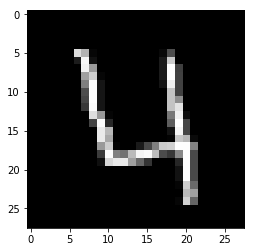

In [139]:
train = "../input/train.csv"
X=  pd.read_csv(train).astype('uint8')
y = X['label']
print(y.shape)
y = np.array(y)
X = X.drop(['label'],axis=1)
d = np.array(X.iloc[:,0:],dtype  = 'uint8')
print(d.shape)
b = np.zeros([42000,28,28,1],dtype = 'uint8')
for i in range(0,42000):
    b[i]=np.reshape(d[i],(28,28,1))
y = to_categorical(y)
X = b
print(X.shape,y.shape)
X = X/255
plt.imshow(np.squeeze(X[3]),cmap='gray')
print(y[3])
plt.show()

> **Building the CNN Architecture**

In [140]:
def build_model(pretrained_weights=None):
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', input_shape = (28,28,1),activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size = (1,1)))
    model.add(Dropout(0.2))
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size = (1,1)))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same',activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same',activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same',activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(10,activation='sigmoid'))
    model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy']) 
    if pretrained_weights:
        model.load_weights(pretrained_weights)
    return model   

> **Training the model**

In [141]:
model=build_model()
model_checkpoint=ModelCheckpoint('convnet.hdf5',monitor='val_loss',save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',mode='min',factor=0.3, patience=10, min_lr=1e-9, verbose=1)
history=model.fit(X,y,batch_size=32,epochs=20,validation_split=0.2,callbacks=[model_checkpoint,reduce_lr])

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 18s 521us/step - loss: 2.3089 - acc: 0.1601 - val_loss: 2.3463 - val_acc: 0.1145
Epoch 2/20
33600/33600 [==============================] - 15s 441us/step - loss: 1.8985 - acc: 0.3378 - val_loss: 2.0579 - val_acc: 0.2202
Epoch 3/20
33600/33600 [==============================] - 15s 442us/step - loss: 1.4873 - acc: 0.4955 - val_loss: 1.3678 - val_acc: 0.5439
Epoch 4/20
33600/33600 [==============================] - 15s 439us/step - loss: 1.1616 - acc: 0.6368 - val_loss: 0.8284 - val_acc: 0.8229
Epoch 5/20
33600/33600 [==============================] - 15s 444us/step - loss: 0.8864 - acc: 0.7430 - val_loss: 0.5079 - val_acc: 0.8964
Epoch 6/20
33600/33600 [==============================] - 16s 463us/step - loss: 0.6860 - acc: 0.8062 - val_loss: 0.3211 - val_acc: 0.9323
Epoch 7/20
33600/33600 [==============================] - 15s 443us/step - loss: 0.5431 - acc: 0.8521 - val_loss: 0.1

> **Checking the model**

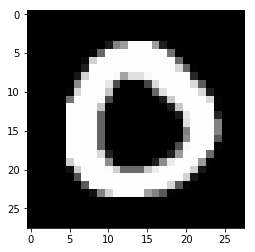

0

In [142]:
model.load_weights('convnet.hdf5')
imag=np.reshape(X[4],(1,28,28,1))
result=model.predict(imag)
plt.imshow(np.squeeze(X[4]),cmap='gray')
plt.show()
np.argmax(result)

> **Loading Test Data**

In [143]:

test= "../input/test.csv"
X_test = pd.read_csv(test).astype('uint8')
d = np.array(X_test.iloc[:,0:],dtype  = 'uint8')
print(d.shape)
b = np.zeros([28000,28,28,1],dtype = 'uint8')
for i in range(0,28000):
    b[i]=np.reshape(d[i],(28,28,1))
X_test=  b

(28000, 784)


> **Predicting **

In [144]:
pred = model.predict(X_test)
label = np.argmax(pred,axis=1)

> **Checking our Test Data**

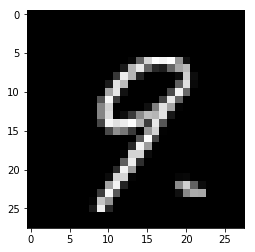

9


In [145]:
plt.imshow(np.squeeze(X_test[2]),cmap='gray')
plt.show()
print(label[2])

> **Creating the Submisison File**

In [146]:
submission = pd.DataFrame({'ImageId':(range(0,len(X_test))),'Label':label})
submission['Label']  = submission.Label.astype(int)
submission.to_csv("submit.csv",index=False)
submission.head()

,ImageId,Label
0,0,2
1,1,0
2,2,9
3,3,0
4,4,0
